In [1]:
# Part two of Divvy EDA
# notebook may have got too large
# Run this cell every time we open the file to do analysis work
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the clean dataset
data = pd.read_csv('~/Documents/Programs/Bikeshare-EDA/data/data_clean.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12736726 entries, 0 to 12736725
Data columns (total 23 columns):
trip_id              int64
year                 int64
month                int64
week                 int64
day                  int64
hour                 int64
usertype             object
gender               object
starttime            object
stoptime             object
tripduration         float64
temperature          float64
events               object
from_station_id      int64
from_station_name    object
latitude_start       float64
longitude_start      float64
dpcapacity_start     float64
to_station_id        int64
to_station_name      object
latitude_end         float64
longitude_end        float64
dpcapacity_end       float64
dtypes: float64(8), int64(8), object(7)
memory usage: 2.2+ GB


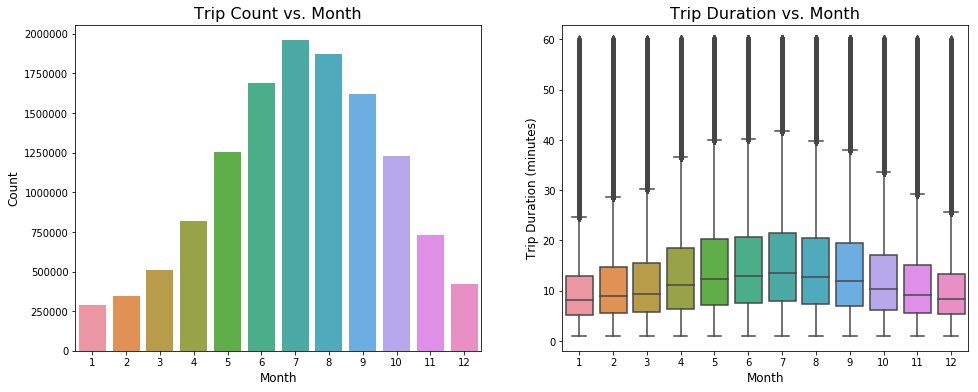

In [2]:
# monthly distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='month', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. Month', fontsize=16)
ax[0].set_xlabel('Month', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.boxplot(x='month', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. Month', fontsize=16)
ax[1].set_xlabel('Month', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)
plt.show()


In [ ]:
%matplotlib inline
# Trip distribution
# Subscriber: Annual Membership
# Cumtomer: 24-hour pass
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='usertype', data=data, ax=ax[0])
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count (log scale)', fontsize=12)

sns.boxplot(x='usertype', y='tripduration', data=data, ax=ax[1])
ax[1].set_title('Trip Duration vs. User Type', fontsize=16)
ax[1].set_xlabel('User Type', fontsize=12)
ax[1].set_ylabel('Trip Duration (minutes)', fontsize=12)

Text(0,0.5,'Count')

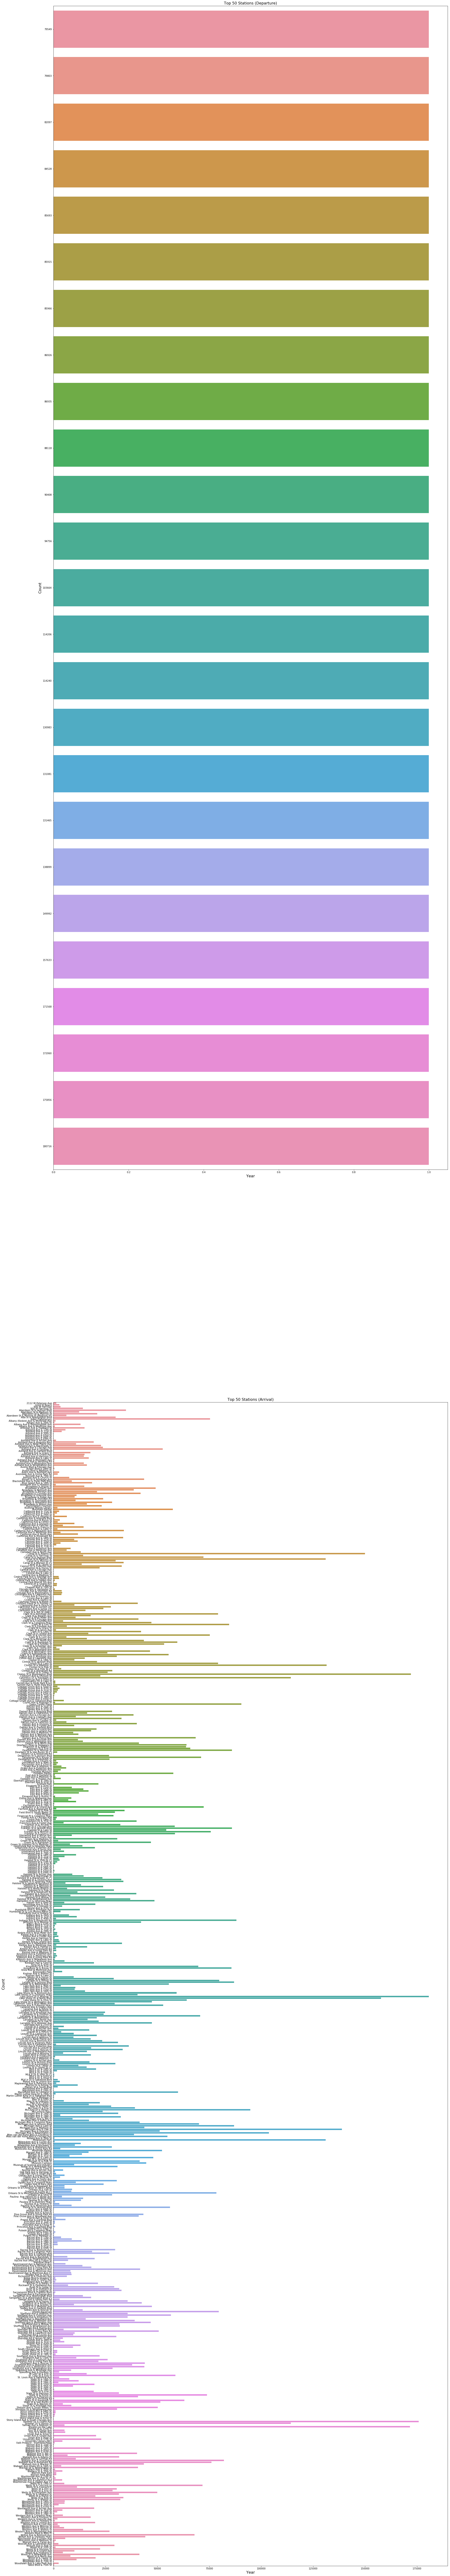

In [50]:
# top 50 most visited stations
data_from = data['from_station_name'].value_counts()[:25].sort_values(ascending=True).to_frame()


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,200))
sns.countplot(y='from_station_name', data=data_from, ax=ax[0])
ax[0].set_title('Top 50 Stations (Departure)', fontsize=16)
ax[0].set_xlabel('Year', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)

sns.countplot(y='from_station_name', data=data, ax=ax[1])
ax[1].set_title('Top 50 Stations (Arrival)', fontsize=16)
ax[1].set_xlabel('Year', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)

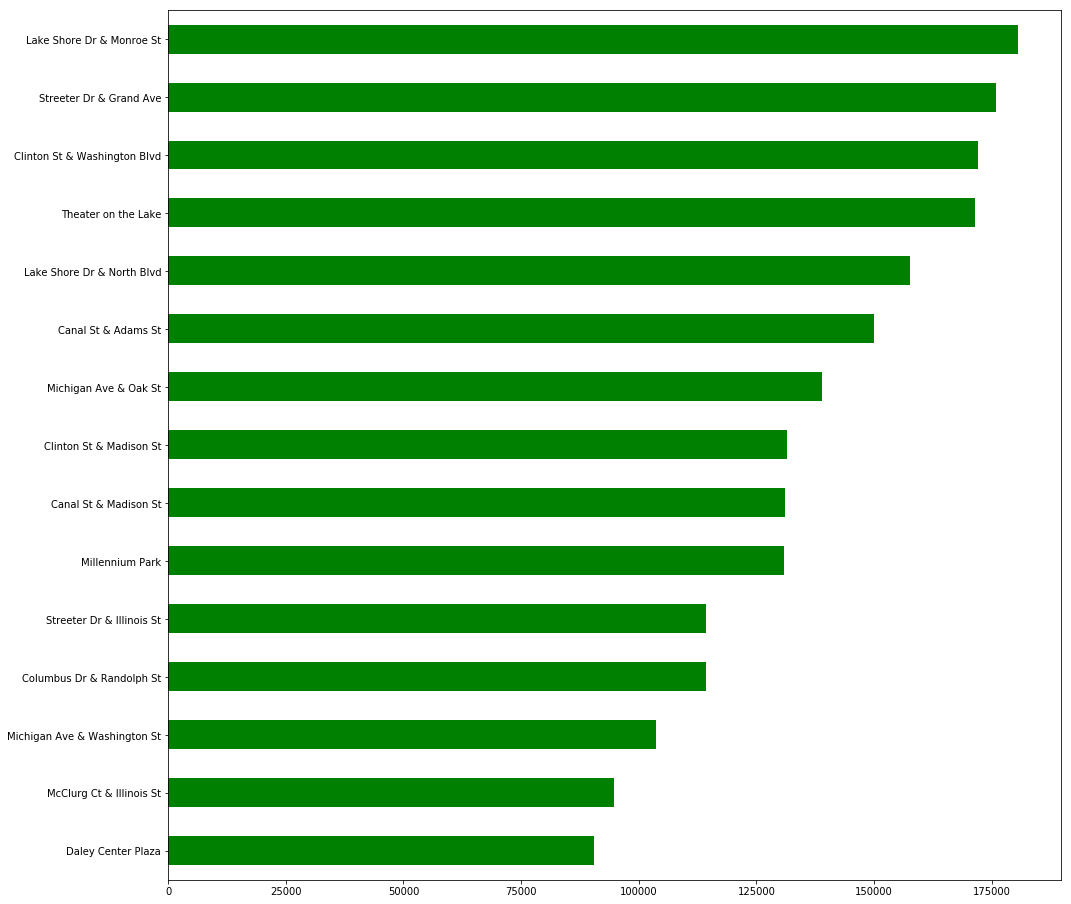

In [34]:
data_from = data['from_station_name'].value_counts()[:25].sort_values(ascending=True).plot(figsize=(16,16), kind='barh', color='g')

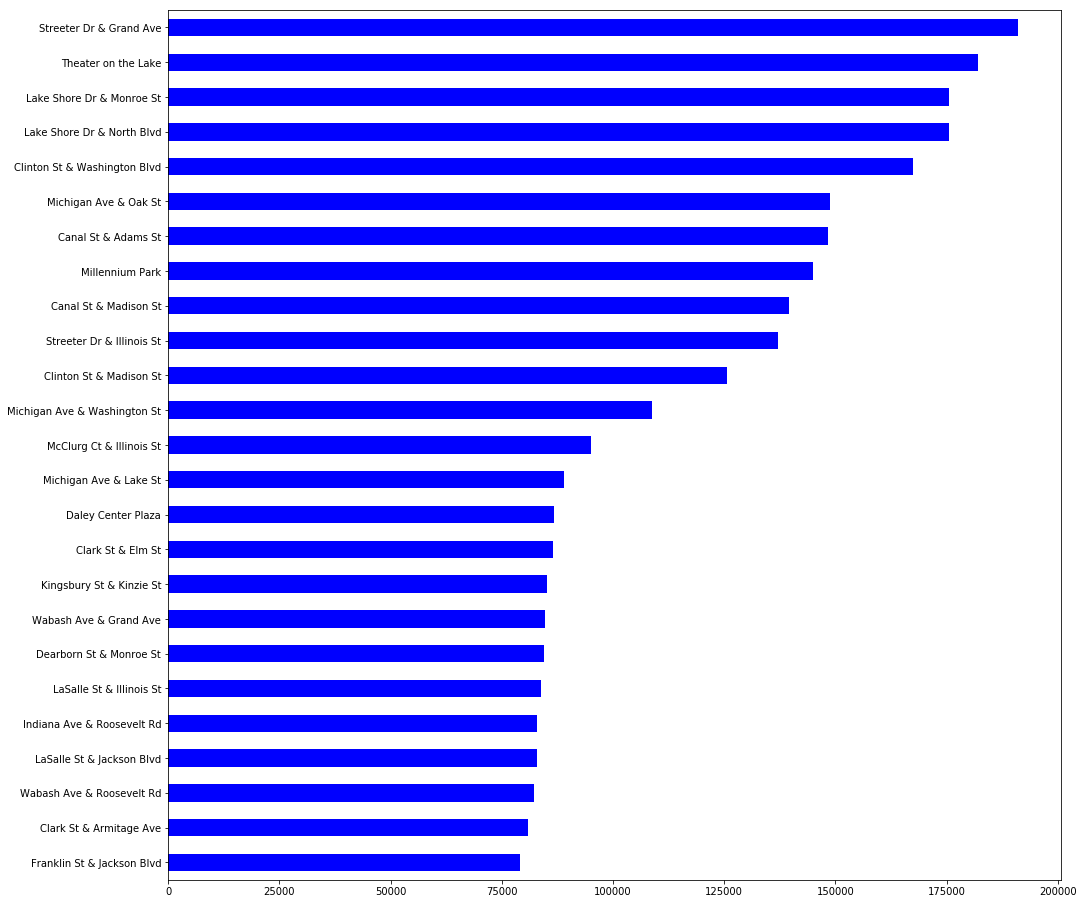

In [33]:
data_to = data['to_station_name'].value_counts()[:25].sort_values(ascending=True).plot(figsize=(16,16), kind='barh', color='b')

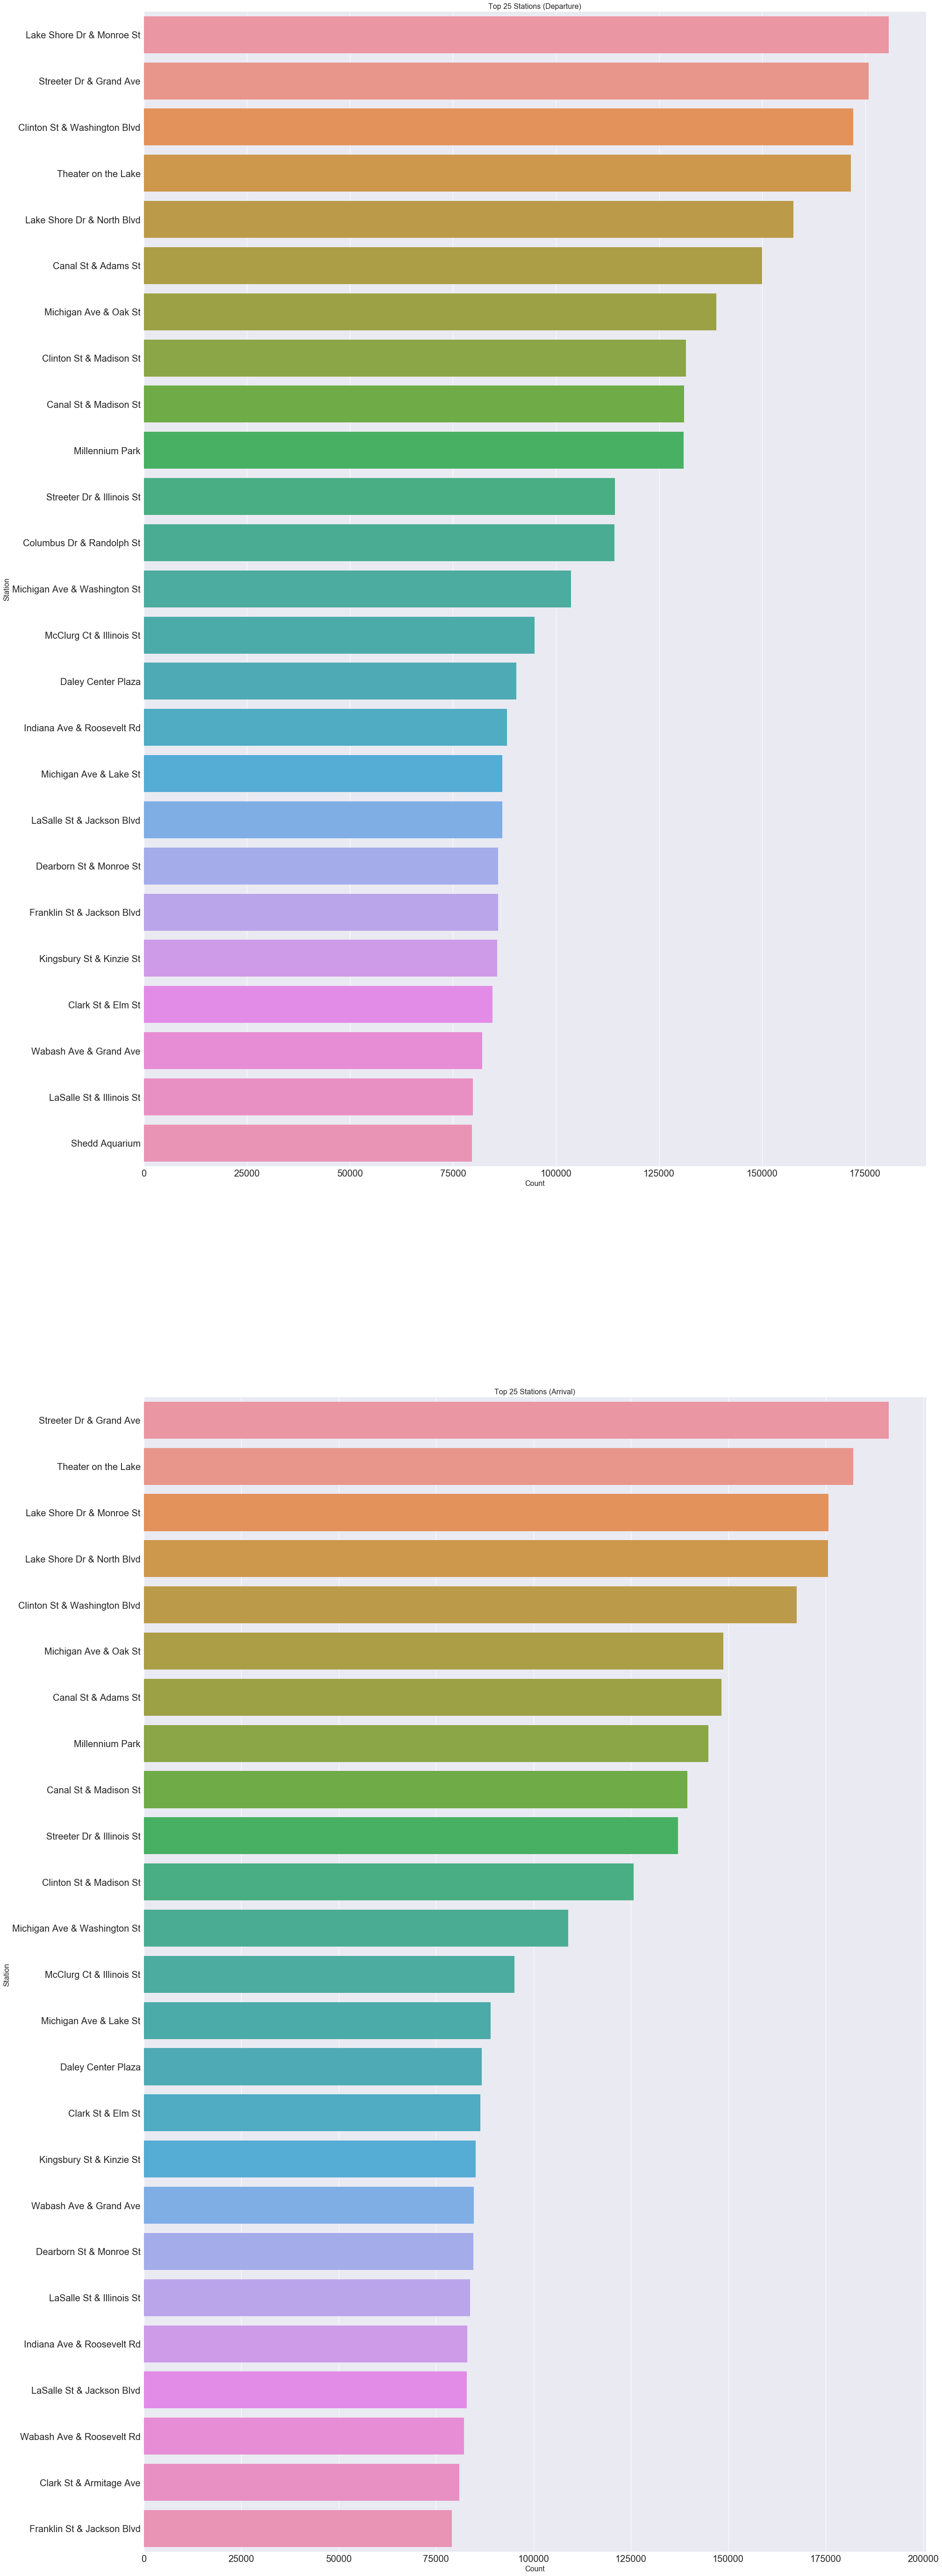

In [84]:
# format data for display of top 25 departure stations
data_from = data['from_station_name'].value_counts()[:25].sort_values(ascending=False).to_frame().reset_index()
data_from = data_from.rename(columns= {0: 'list'})
data_from.index.name = 'index'

# format data for display of top 25 Arrival stations
data_to = data['to_station_name'].value_counts()[:25].sort_values(ascending=False).to_frame().reset_index()
data_to = data_to.rename(columns= {0: 'list'})
data_to.index.name = 'index'

# plot both
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(30,100))
sns.barplot(y='index', x="from_station_name", data=data_from, ax=ax[0])
ax[0].set_title('Top 25 Stations (Departure)', fontsize=16)
ax[0].set_xlabel('Count', fontsize=16)
ax[0].set_ylabel('Station', fontsize=16)

sns.barplot(y='index', x="to_station_name", data=data_to, ax=ax[1])
ax[1].set_title('Top 25 Stations (Arrival)', fontsize=16)
ax[1].set_xlabel('Count', fontsize=16)
ax[1].set_ylabel('Station', fontsize=16)

sns.set(font_scale=2)

,index,from_station_name
index,,
0,Lake Shore Dr & Monroe St,180716
1,Streeter Dr & Grand Ave,175856
2,Clinton St & Washington Blvd,172060
3,Theater on the Lake,171568
4,Lake Shore Dr & North Blvd,157633
